# Keras ResNet classifier for CIFAR10 test
ResNet32 network for CIFAR10 network test

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from data_utils import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

import tensorflow as tf 
from keras import backend as k
import os
config = tf.ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 0.1
config.gpu_options.allow_growth = True
k.tensorflow_backend.set_session(tf.Session(config=config))

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
# get data
cifar10_data = CIFAR10Data()
x_train, y_train, x_test, y_test = cifar10_data.get_data(subtract_mean=True)

num_train = int(x_train.shape[0] * 0.9)
num_val = x_train.shape[0] - num_train
mask = list(range(num_train, num_train+num_val))
x_val = x_train[mask]
y_val = y_train[mask]

mask = list(range(num_train))
x_train = x_train[mask]
y_train = y_train[mask]

data = (x_train, y_train, x_val, y_val, x_test, y_test)

CIFAR10 Training data shape: (50000, 32, 32, 3)
CIFAR10 Training label shape (50000, 1)
CIFAR10 Test data shape (10000, 32, 32, 3)
CIFAR10 Test label shape (10000, 1)


# test with resnet32
resnet56 is inffered in the ResNet paper.

In [29]:
from classifiers.ResNet import ResNet32ForCIFAR10
from keras import losses
from keras import optimizers

weight_decay = 1e-4
lr = 1e-1
num_classes = 10
resnet32 = ResNet32ForCIFAR10(input_shape=(32, 32, 3), classes=num_classes, weight_decay=weight_decay)
opt = optimizers.SGD(lr=lr, momentum=0.9, nesterov=True)
resnet32.compile(optimizer=opt,
                 loss=losses.categorical_crossentropy,
                 metrics=['accuracy'])
resnet32.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_133 (Conv2D)             (None, 32, 32, 16)   432         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_133 (BatchN (None, 32, 32, 16)   64          conv2d_133[0][0]                 
__________________________________________________________________________________________________
activation_133 (Activation)     (None, 32, 32, 16)   0           batch_normalization_133[0][0]    
__________________________________________________________________________________________________
conv2d_134

In [30]:
%%time
from cifar10_solver import *
# from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler

def lr_scheduler(epoch):
    new_lr = lr
    if epoch <= 91:
        pass
    elif epoch > 91 and epoch <= 137:
        new_lr = lr * 0.1
    else:
        new_lr = lr * 0.01
    print('new lr:%.2e' % new_lr)
    return new_lr 


reduce_lr = LearningRateScheduler(lr_scheduler)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
#                               patience=10, min_lr=1e-6, verbose=1)

solver = CIFAR10Solver(resnet32, data)
history = solver.train(epochs=182, batch_size=128, data_augmentation=True, callbacks=[reduce_lr])

train with data augmentation
Epoch 1/182
new lr:1.00e-01
352/352 [==============================] - 44s 125ms/step - loss: 2.5097 - acc: 0.1958 - val_loss: 2.2051 - val_acc: 0.2220
Epoch 2/182
new lr:1.00e-01
352/352 [==============================] - 30s 85ms/step - loss: 1.9226 - acc: 0.3458 - val_loss: 2.8293 - val_acc: 0.2528
Epoch 3/182
new lr:1.00e-01
352/352 [==============================] - 31s 88ms/step - loss: 1.6120 - acc: 0.4656 - val_loss: 1.6968 - val_acc: 0.4458
Epoch 4/182
new lr:1.00e-01
352/352 [==============================] - 31s 89ms/step - loss: 1.3700 - acc: 0.5601 - val_loss: 1.3532 - val_acc: 0.5686
Epoch 5/182
new lr:1.00e-01
352/352 [==============================] - 31s 89ms/step - loss: 1.1956 - acc: 0.6270 - val_loss: 1.5867 - val_acc: 0.5106
Epoch 6/182
new lr:1.00e-01
352/352 [==============================] - 31s 89ms/step - loss: 1.0475 - acc: 0.6836 - val_loss: 1.2881 - val_acc: 0.6102
Epoch 7/182
new lr:1.00e-01
352/352 [===========================

352/352 [==============================] - 28s 80ms/step - loss: 0.4985 - acc: 0.9102 - val_loss: 0.9485 - val_acc: 0.7814
Epoch 55/182
new lr:1.00e-01
352/352 [==============================] - 28s 81ms/step - loss: 0.4870 - acc: 0.9155 - val_loss: 1.1566 - val_acc: 0.7410
Epoch 56/182
new lr:1.00e-01
352/352 [==============================] - 28s 78ms/step - loss: 0.4943 - acc: 0.9131 - val_loss: 1.8289 - val_acc: 0.6050
Epoch 57/182
new lr:1.00e-01
352/352 [==============================] - 27s 77ms/step - loss: 0.4977 - acc: 0.9102 - val_loss: 1.1127 - val_acc: 0.7476
Epoch 58/182
new lr:1.00e-01
352/352 [==============================] - 29s 83ms/step - loss: 0.5006 - acc: 0.9110 - val_loss: 1.3689 - val_acc: 0.6974
Epoch 59/182
new lr:1.00e-01
352/352 [==============================] - 29s 84ms/step - loss: 0.4930 - acc: 0.9123 - val_loss: 0.9204 - val_acc: 0.7906
Epoch 60/182
new lr:1.00e-01
352/352 [==============================] - 29s 83ms/step - loss: 0.4949 - acc: 0.9128 - 

352/352 [==============================] - 30s 84ms/step - loss: 0.2461 - acc: 0.9891 - val_loss: 0.4907 - val_acc: 0.9272
Epoch 109/182
new lr:1.00e-02
352/352 [==============================] - 29s 83ms/step - loss: 0.2409 - acc: 0.9903 - val_loss: 0.5050 - val_acc: 0.9238
Epoch 110/182
new lr:1.00e-02
352/352 [==============================] - 30s 86ms/step - loss: 0.2369 - acc: 0.9910 - val_loss: 0.5009 - val_acc: 0.9276
Epoch 111/182
new lr:1.00e-02
352/352 [==============================] - 31s 87ms/step - loss: 0.2337 - acc: 0.9907 - val_loss: 0.5052 - val_acc: 0.9256
Epoch 112/182
new lr:1.00e-02
352/352 [==============================] - 30s 86ms/step - loss: 0.2289 - acc: 0.9916 - val_loss: 0.4986 - val_acc: 0.9268
Epoch 113/182
new lr:1.00e-02
352/352 [==============================] - 30s 87ms/step - loss: 0.2250 - acc: 0.9922 - val_loss: 0.4975 - val_acc: 0.9270
Epoch 114/182
new lr:1.00e-02
352/352 [==============================] - 31s 88ms/step - loss: 0.2204 - acc: 0.9

Epoch 162/182
new lr:1.00e-03
352/352 [==============================] - 27s 78ms/step - loss: 0.1445 - acc: 0.9990 - val_loss: 0.4774 - val_acc: 0.9284
Epoch 163/182
new lr:1.00e-03
352/352 [==============================] - 28s 79ms/step - loss: 0.1456 - acc: 0.9985 - val_loss: 0.4788 - val_acc: 0.9288
Epoch 164/182
new lr:1.00e-03
352/352 [==============================] - 28s 79ms/step - loss: 0.1444 - acc: 0.9989 - val_loss: 0.4791 - val_acc: 0.9290
Epoch 165/182
new lr:1.00e-03
352/352 [==============================] - 28s 81ms/step - loss: 0.1445 - acc: 0.9986 - val_loss: 0.4773 - val_acc: 0.9302
Epoch 166/182
new lr:1.00e-03
352/352 [==============================] - 27s 77ms/step - loss: 0.1440 - acc: 0.9990 - val_loss: 0.4774 - val_acc: 0.9282
Epoch 167/182
new lr:1.00e-03
352/352 [==============================] - 27s 77ms/step - loss: 0.1434 - acc: 0.9990 - val_loss: 0.4796 - val_acc: 0.9286
Epoch 168/182
new lr:1.00e-03
352/352 [==============================] - 27s 77ms/

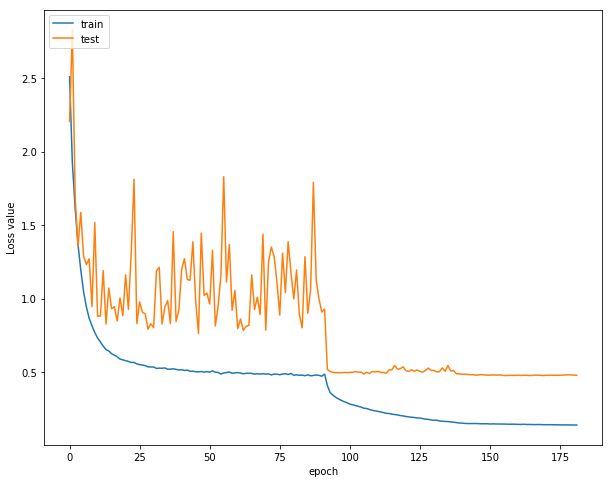

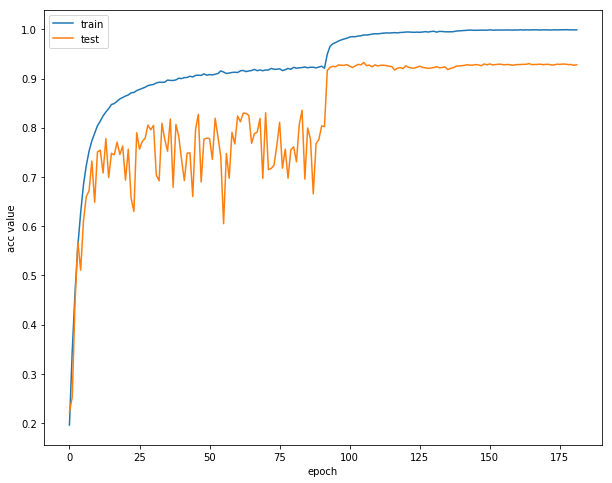

In [31]:
# plot loss and acc 
plot_history(history)

In [32]:
solver.test()

10000/10000 [==============================] - 4s 428us/step
test data loss:0.52 acc:0.9212
